<a href="https://colab.research.google.com/github/syuhraputri27/syuhraputri27/blob/main/ImplementCNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Syuhra Putri Ganiswari

NIM  : 22/505327/NPA/19811

## **Importing Libraries**

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.__version__)

2.9.2


## **Loading MNIST Dataset**

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## **Reshaping and Normalizing the data**

In [ ]:
input_shape = (28, 28, 1)

training_images = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2], 1)
training_images = training_images/255.0
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
test_images = test_images/255.0

5


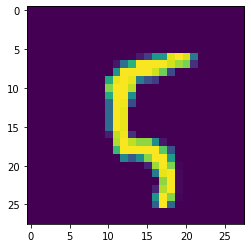

In [ ]:
plt.imshow(training_images[100][:,:,0])
print(training_labels[100])

In [ ]:
# print(training_images[0])
# print(test_images[0])

## **Creating Neural Network**

In [ ]:
batch_size = 64
num_classes = 10
epochs = 5

In [ ]:
callback_ES = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.05,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
model = tf.keras.models.Sequential([
    # 1st layer
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    # 2nd layer
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        4128      
                                                                 
 batch_normalization_7 (Batc  (None, 12, 12, 32)      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **Training and Evaluating the data**

In [ ]:
history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[callback_ES])

Epoch 1/5
844/844 [==============================] - 62s 73ms/step - loss: 0.4925 - accuracy: 0.8384 - val_loss: 0.2575 - val_accuracy: 0.9163
Epoch 2/5
844/844 [==============================] - 62s 73ms/step - loss: 0.2266 - accuracy: 0.9264 - val_loss: 0.0919 - val_accuracy: 0.9717
Epoch 3/5
844/844 [==============================] - 63s 75ms/step - loss: 0.1787 - accuracy: 0.9431 - val_loss: 0.0643 - val_accuracy: 0.9827
Epoch 4/5
844/844 [==============================] - 62s 74ms/step - loss: 0.1506 - accuracy: 0.9512 - val_loss: 0.0942 - val_accuracy: 0.9733
Epoch 5/5
358/844 [===========>..................] - ETA: 34s - loss: 0.1413 - accuracy: 0.9558

Graphs

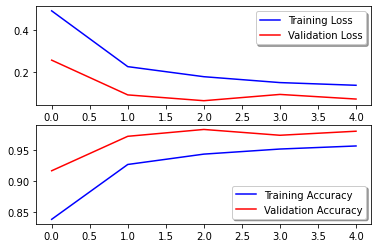

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0643 - accuracy: 0.9786
0.978600025177002


In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(training_images[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08576415, 0.08576424, 0.08576422, 0.08884478, 0.08576415,
        0.22503881, 0.08576427, 0.08576424, 0.08576529, 0.08576588],
       [0.23196909, 0.08533676, 0.08533677, 0.08533676, 0.08533677,
        0.08533676, 0.0853368 , 0.08533677, 0.08533677, 0.08533677],
       [0.08533834, 0.08533835, 0.08533859, 0.08533835, 0.23194396,
        0.08533834, 0.08533834, 0.08533934, 0.0853384 , 0.08534794],
       [0.08533759, 0.23195598, 0.08533761, 0.08533759, 0.08534187,
        0.08533759, 0.08533759, 0.08533803, 0.08533857, 0.08533764],
       [0.08534681, 0.08534681, 0.08534683, 0.08534732, 0.08540568,
        0.08534683, 0.08534681, 0.08534875, 0.08535423, 0.23180996]],
      dtype=float32)>

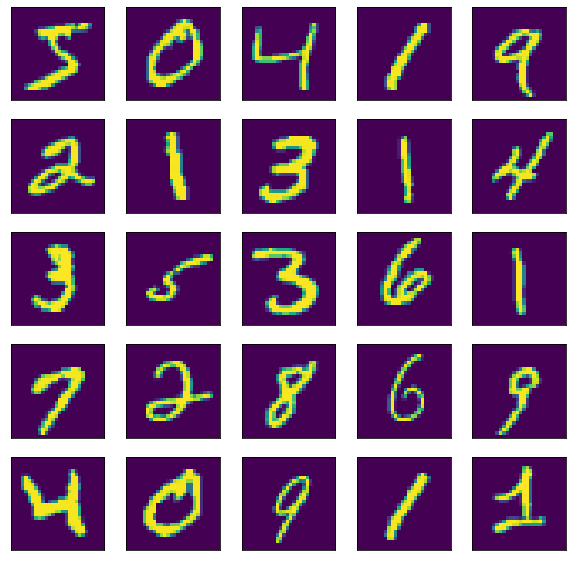

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i][:,:,0])
plt.show()